# Clustering on Breast Cancer Data

### To get to know clustering and its use, we will be diving into the medical informatics realm and see how clustering can help us with distinguishing and diagnosing different tumors

### The prompt here will be a focus on knowledge discovery where we will pretend that we don't know the difference between benign and malignant tumors and just know that there is something different about them. You as the amazing informatician are tasked with providing insights to what may be the difference between the two tumors and what their "profiles" may be! °˖✧◝(⁰▿⁰)◜✧˖°

### The Data: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Some Domain Knowledge and Variable Notes:
- Radius/Area/Perimeter all follow the concepts learned in previous math classes
- Texture again is similar to what you think, its texture but its used more for understanding how many tumors are they looking at and if they are all the same kind. 
- Smoothness: How smooth it is, nothing fancy
- Compactness: Volume of the tumor (Uses parimeter and area to calculate)
- Concavity: If there are concave points, how deep are the point
- Concave Points: how places where the tumor dips and is concave
- Fractal Dimension: Can be thought of as how complext the shape is. If a tumor is invading cells, it will be more jagged/complex compared to something that isn't able to invade cells and is only able to push them which creates a smoother/less complex shape.  
- Worst: This is the measure of the "worst" case of how big the tumor is. Basically the biggest possible measure for the tumor. 
- Mean and Standard Error also follow what you learned in past math courses. Whats the average measure of the tumor and how off may that average be since they are even shapes typically. 


# Getting Set Up

In [102]:
# Install if needed
# !pip install plotly
# !pip install scipy

In [103]:
# Import the essentials ●‿●
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

In [104]:
# READ! IN! THAT! DATA!!!
df = pd.read_csv("Cancer_Data.csv")

# Go ahead and drop the target to pretend we care not in the future where we know the difference
df = df.drop(columns = 'diagnosis')

# Take a sneak peek at what it has to offer
df.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

# Let's take a sneak peek at what it has to offer before diving in

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [106]:
# Get some summary stats
# The '.T' flips the columns and rows for easier viewing
# You can also leave the '.T' off if you the like columns to be the header row :)
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

### Visualize relationships

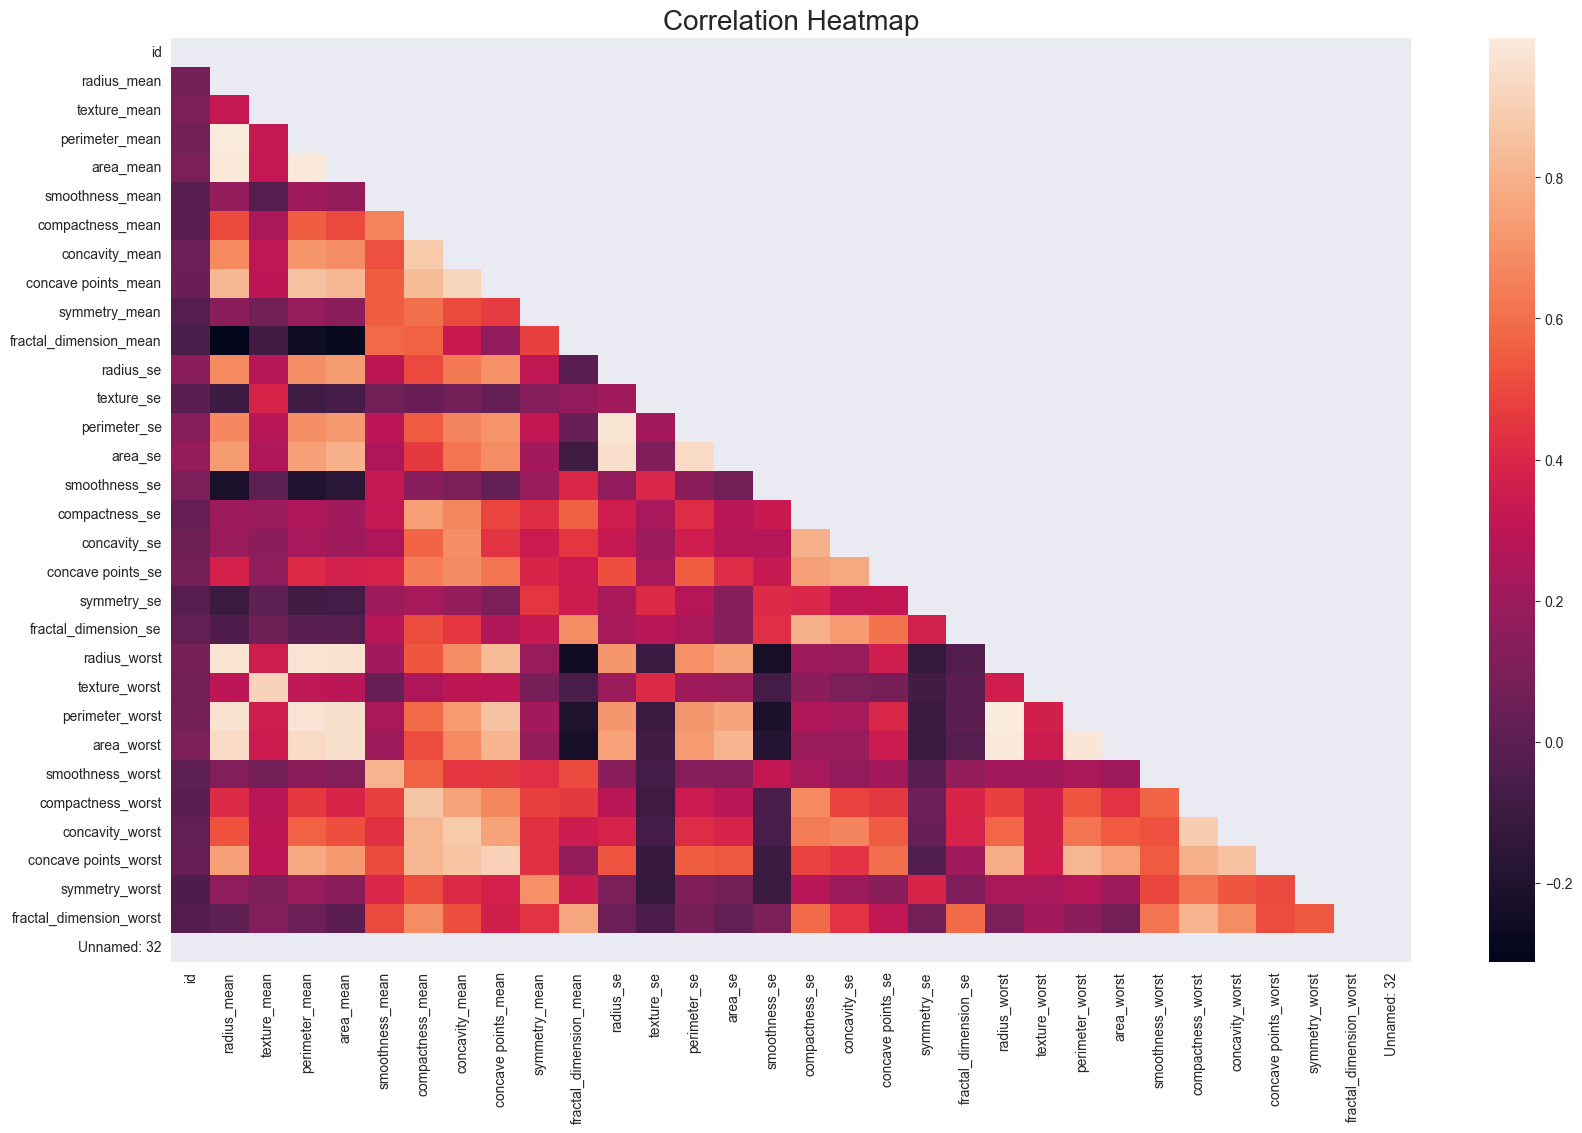

In [107]:
# Get the correlations
corr = df.corr()

# Create a mask so that way we only see the lower half of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 12))

sns.heatmap(corr, mask=mask)

plt.title('Correlation Heatmap', fontsize=20)
plt.show()

### Some Initial Insights:
- Will need to drop the Unnamed:32 column. It offers nothing for us so it shall be banished
- Will be dropping the "targets" as we again will be going into this blind and unsupervised ヽ(⌐■_■)ノ
- ID also will be removed as we shouldn't be worrying about it for analytical reasons.
- There is alot of collinearity, so we need to check in on that and see what we can do!
- We can see there is a different scale from variable to variable, we will need to normalize or standardize due to the algorithms being utilized in later steps will use distance for calculating.

# Cleaning up the data

### The Basics

Let's drop the variables we don't need and standardized the data. 

In [108]:
# drop the columns we mentioned previously
df = df.drop(columns=['id','Unnamed: 32'])

In [109]:
# Lets standardize the data
standardized_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns = df.columns)
standardized_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

### Dimentionality Reduction 

Lets get a look at our variables one more time, but this time focus more on the variables that are the higher correlated ones

<Axes: >

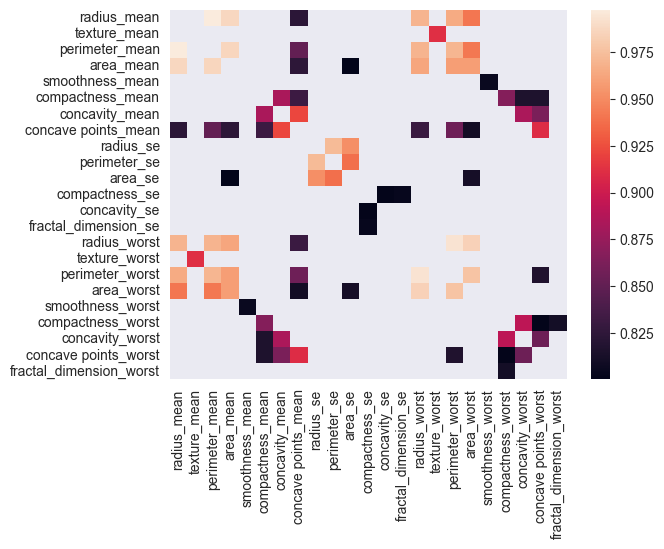

In [110]:
correlations= standardized_df.corr()

# Get those who have a high correlation of .9 or higher
high_corr = correlations[abs(correlations) >= .8]

# This is so we can drop the diagonal since it will be correlation of 1
# Set it to null and we can drop it with the rest 
high_corr.replace(1, np.nan, inplace=True)

# Drop rows and columns where they have no high correlation with anything
high_corr.dropna(how='all', axis=0, inplace=True)
high_corr.dropna(how='all', axis=1, inplace=True)

# Due to the pallet having white and the missing correlations being white, lets darken the background
sns.set_style('dark')

sns.heatmap(high_corr)

#### Insights:
- Radius Mean: perimeter_mean, smoothness_mean, fractal_dimension_mean, symmetry_mean, area_mean, radius_worst,perimeter_worst, area_worst
- Texture Mean: Texture worst
- Area_mean: Area_worst
- Radius SE: Perimeter_se

### Second thought, while some of these variables play into one another, some have their own insights that can be gained from them making it maybe not the best idea to drop them. What can we do to keep them in but not have all this multicolinearity? 

### Let's use PCA! 

Why will we use PCA is its hard to understand the components? 

While it is harder to understand the components as variables, you can go back and visualize the clusters created using the PCA components within the original data context. This will let us keep those variables in that could hold some insight since we are trying to optimize knowledge discovery compared to prediction accuracy. 

Lets first get a look at how many components would be a good amount to compute the most variance. 

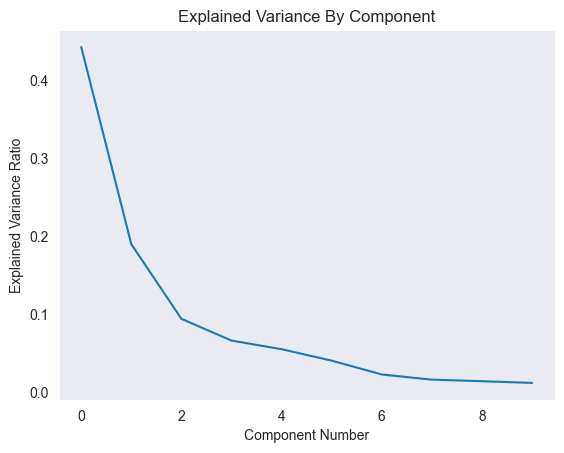

In [111]:
# documentation: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(n_components=0.95) # instead of us picking the number, let it pick 
pca.fit(standardized_df)

# Get percentage of variance explained by each of the selected components
plt.plot(pca.explained_variance_ratio_) 

plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance By Component')

plt.show()

It looks like 3 (as the components indexing starts at zero) may be a good number. This part is subjective but we want to pick a point thats the smallest component number but still holds a good amount of variance.

In [112]:
# Initialize PCA at the 3 components we want
pca = PCA(n_components = 3, random_state = 42) 

# Fit PCA to the data, transform the data and then make it a dataframe we know and love
pca_df = pd.DataFrame(pca.fit_transform(standardized_df))

pca_df.shape

(569, 3)

Now the we are ready to begin!

# K-Means Clustering

## Figuring out the optimal number for K

#### Common Method: Elbow Plot

An elbow plot visualized the inertia (How 'tight' or defined clusters are) as we move up in the number of clusters. We want to pick a place where the rate of change in inertia drops off and creates a kink in the plot. Another way to think of it is if the plots line was a stick persons arm, where would their elbow be? 

Picking the elbow can be subjective but it is a great place to see atleast what numbers of K you may need to play with.

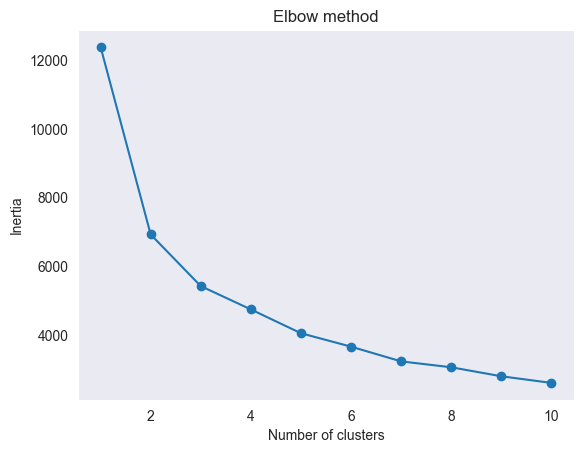

In [113]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    clusters = kmeans.fit_predict(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

How many clusters look to be the best? 

#### Are there any other methods to help determine which number of K may be best to better help decide? YES! 

Sillouette Score: Scoring metric that compares the different points and how similar it is to its own cluster but also how dissimilar it is from other clusters. Values closer to one show a point is similar to the cluster it was assigned and not similar to other clusters while closer it is to -1 shows that points in clusters are more similar to other clusters and not the cluster it was assigned. 

WARNING: Only use this method to try and decide from a couple points that obviously create some elbow. If your plot is a straight line or the rate in which varience decreases holds steady, this is a sign that K-means is not the clustering model you should use. It should also not be your default to determine the optimal number for k!

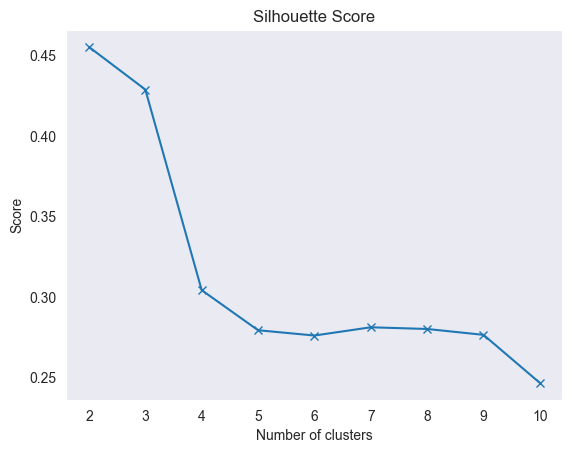

In [114]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, clusters))

plt.plot(range(2,11), silhouette_scores, marker='x')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Did this help with picking the best K? 

## Model Implementation

Now we can get to the part we all been waiting for: K-Means

We will make the model using two clusters mentioned previously. We will fitit to our PCA data but when we get the resulting clusters, we will add it back to out original data frame so that way we can get our actual findings. 

Reminder: since we made the components using all the original data, we are able to do this. If you use PCA and got 6 components from it but only use 3, you can't use this method but would have to go back and get to know what variables relate to what component. 

In [5]:
# Create the model using what we see as the optimal number of clusters
kmeans=KMeans(n_clusters = 2, random_state = 42)

# Fit the model
# using the pca frame did earlier
kmeans.fit(pca_df)

# get what cluster the model thinks the points belong to and add it to our original dataframe
standardized_df['Clusters']= Kmeans.predict(pca_df)

NameError: name 'KMeans' is not defined

In [3]:
# Lets check that the clusters actually contain points
standardized_df['Clusters'].value_counts()

NameError: name 'standardized_df' is not defined

## Evaluation

Well, how do we evaluate since we don't actually know if the clusters are right or not? 

You will use visuals to do so. From here, it is similar to how you would get to know your targets when working on visualizations for your projects. We don't know what those targets mean, its just that the approach is the same. What do distributions and summary statistics look like? 

For time, we will look at a subset of only a few variables. Realistically you would likely look at most if not all of them. If you want to play around with it, its definitely encourge! Additional insights will let you get the full picture of what may or may not be the best differences to discuss. 

**<u>While the scoring metric used earlier is a metric, do not use it as the final say of your model.</u>** The goal here and with your projects is to gather insights or knowledge to what these different clusters are. You need to visualize your clusters to actually 'evaluate' the model

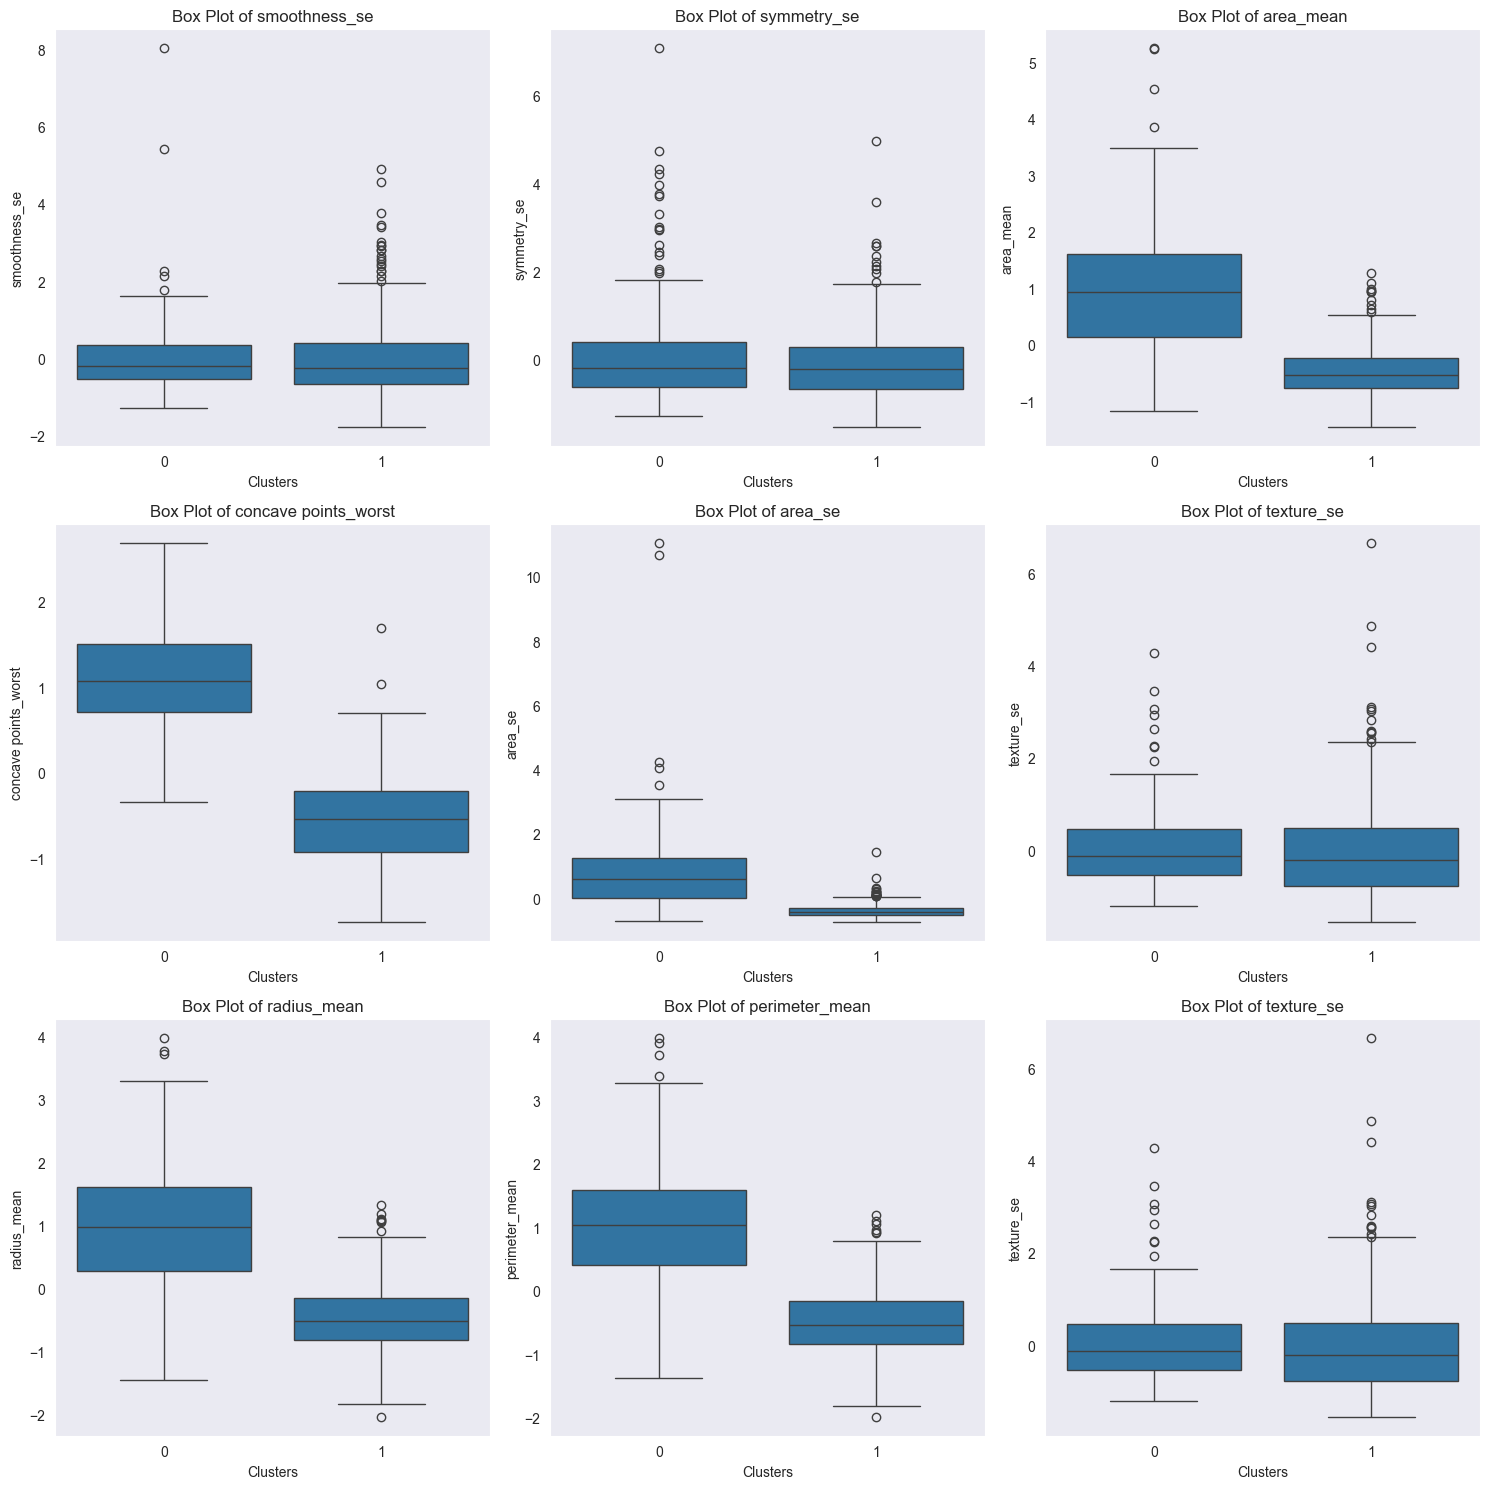

In [117]:
subset = ['smoothness_se', 'symmetry_se', 'area_mean', 'concave points_worst','area_se','texture_se','radius_mean', 'perimeter_mean', 'texture_se' ]
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten() # need this so you can index axs as a 1D array rather than a multidimensional array

i = 0

for column in subset:
    sns.boxplot(data=standardized_df, y=column, x=standardized_df["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

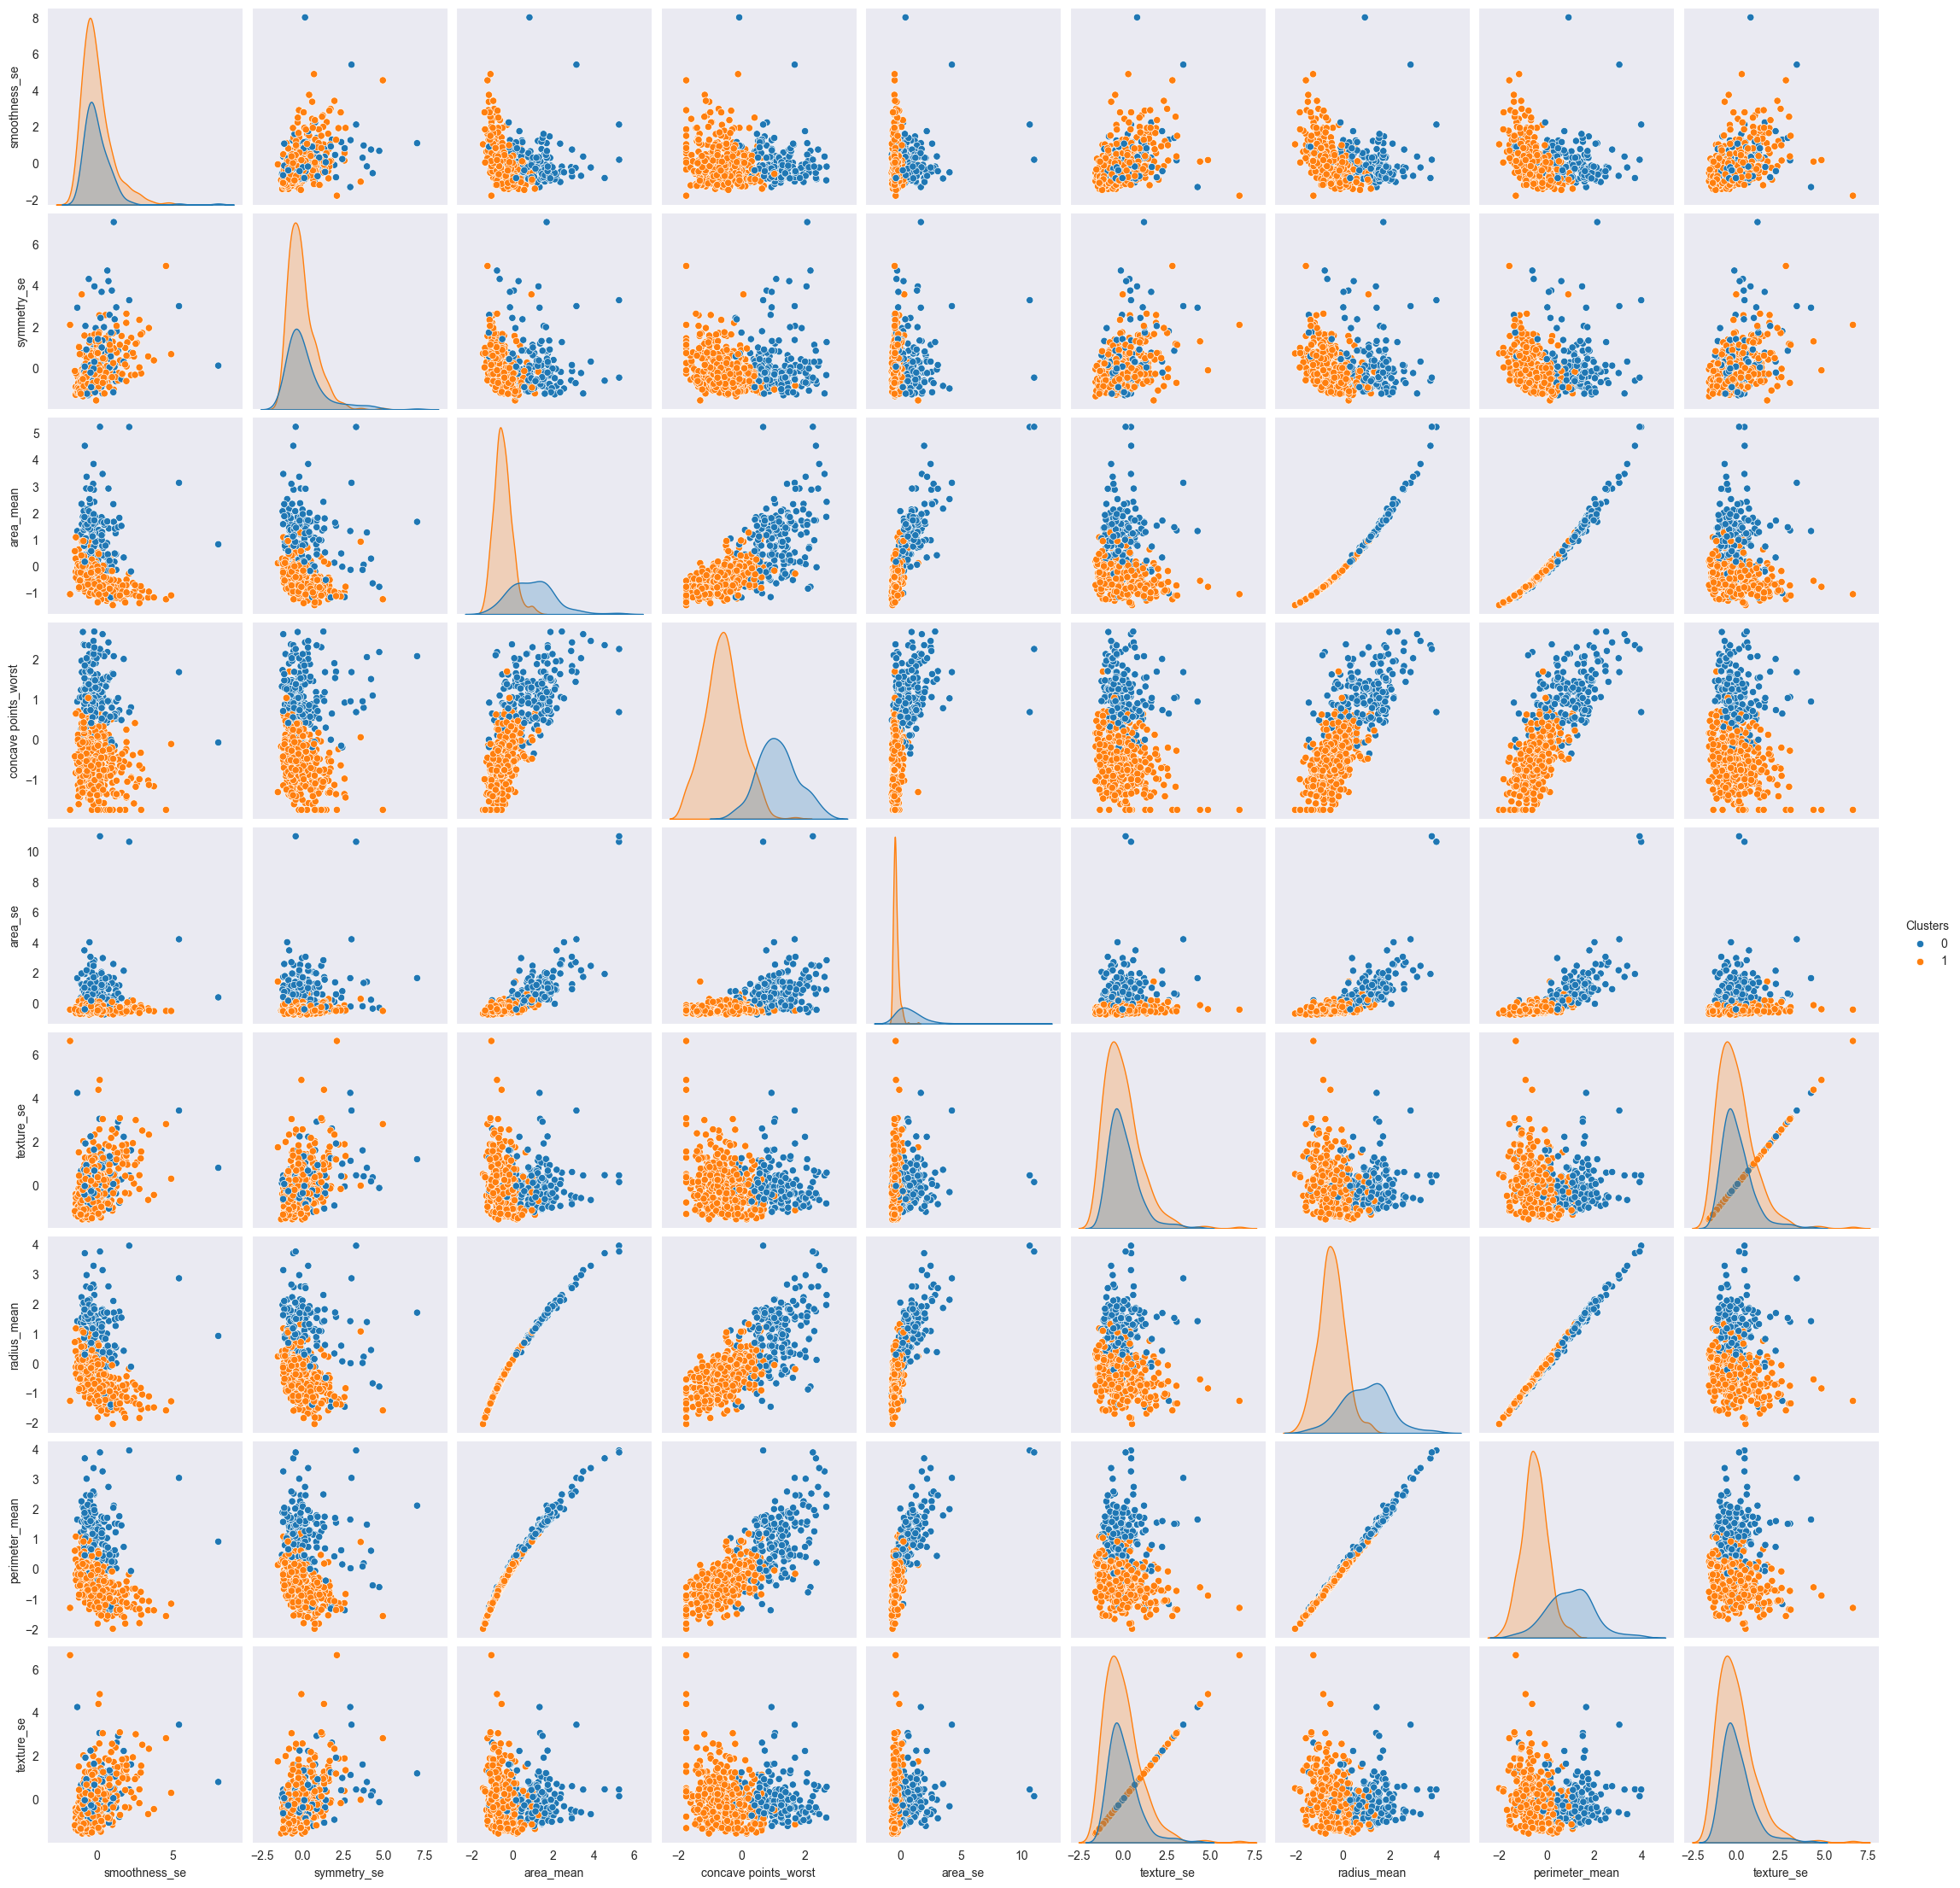

In [118]:
sns.pairplot(standardized_df, hue='Clusters', vars=subset)
plt.show()

What insights do we gain from the visuals about the clusters? 

# Agglomerative Clustering

### Figure out the optimal number of clusters

Due to how Agglomerative Clustering works, we will need to utilize another method to determine the optimal number of clusters. You can for comparison sake stick with two, but whats the fun in that? Especially where k-means wasn't the best, we want to start from a clean state rather than build off the previous model. 

Dendrograms create a tree that helps show how clusters merge as you move up the number of clusters. The optimal number again can b subjective, but you want the number of cluster 

Spoiler Alert: To tell the model how we want it to determine how clusters merge, we will set linkage to single so that way it merges clusters based on how close they are to one another. We will let the dendrogram know this so it also knows how to merge. 

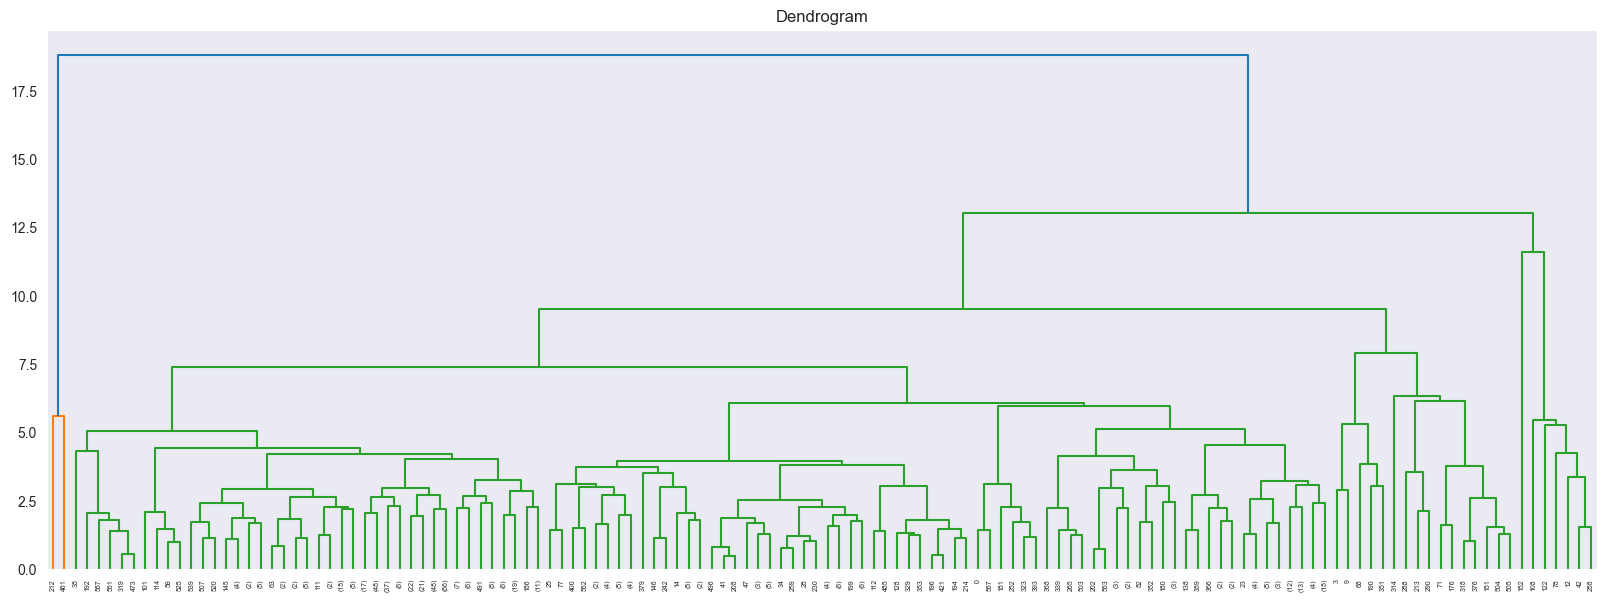

In [119]:
# documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

plt.figure(figsize=(20, 7))
plt.title("Dendrogram")

#lets make the dendrogram 
dend = shc.dendrogram(shc.linkage(pca_df,method='average'), truncate_mode='level',p=10)

plt.show()

What looks to be the best number of clusters? 

### Implementation

In [7]:
# play around with other linkages and see how it effects how many samples are put into clusters. 'single' is a fun one
# we will stick with the default parameters for now

# Implement model
agglo = AgglomerativeClustering(linkage='ward')

# Get the clusters
standardized_df['Clusters'] = agglo.fit_predict(pca_df)

NameError: name 'AgglomerativeClustering' is not defined

In [121]:
standardized_df['Clusters'].value_counts()

Clusters
1    366
0    203
Name: count, dtype: int64

## Evaluation

We will again get to know our clusters using visuals. We shall stick to the same subset as before for simplicity

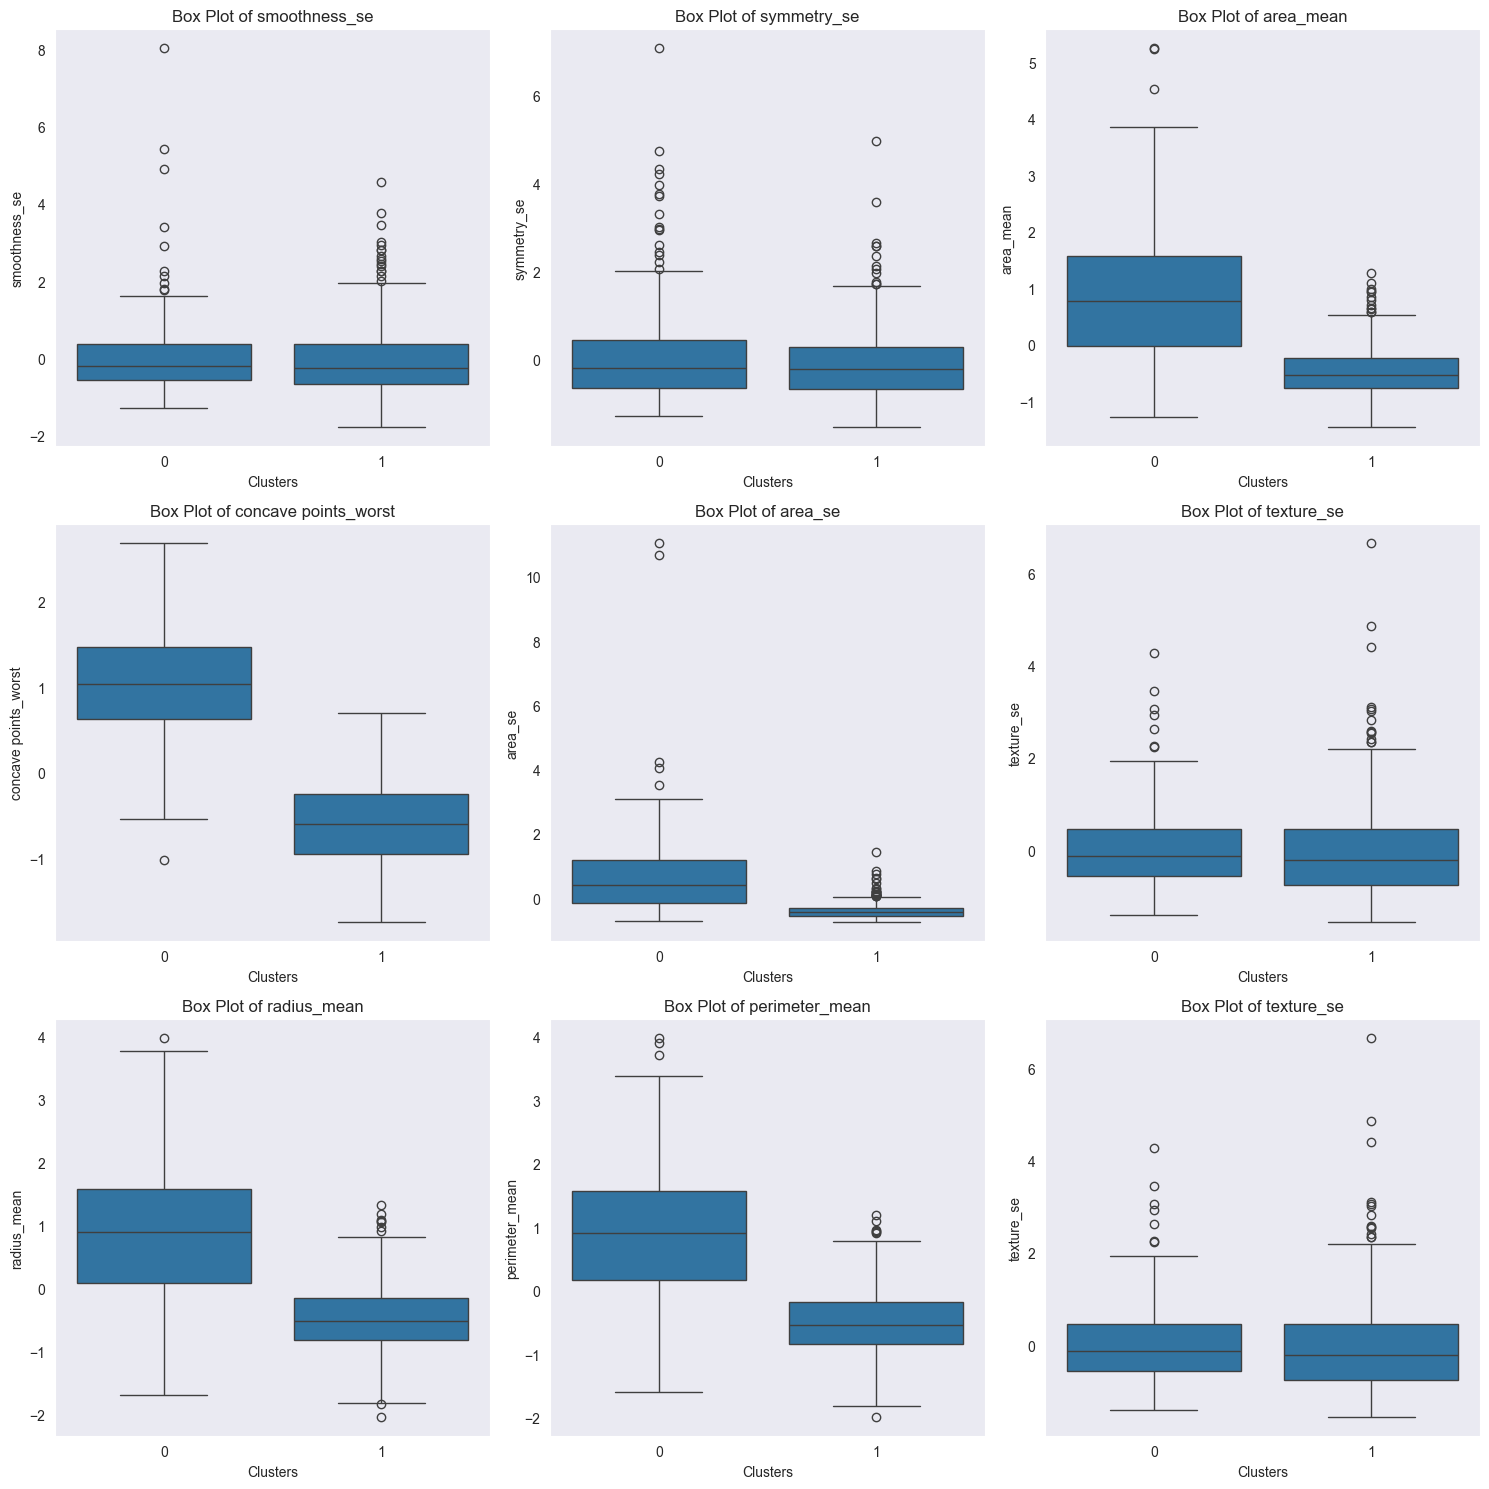

In [122]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten() # need this so you can index axs as a 1D array rather than a multidimensional array

i = 0

for column in subset:
    sns.boxplot(data=standardized_df, y=column, x=standardized_df["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

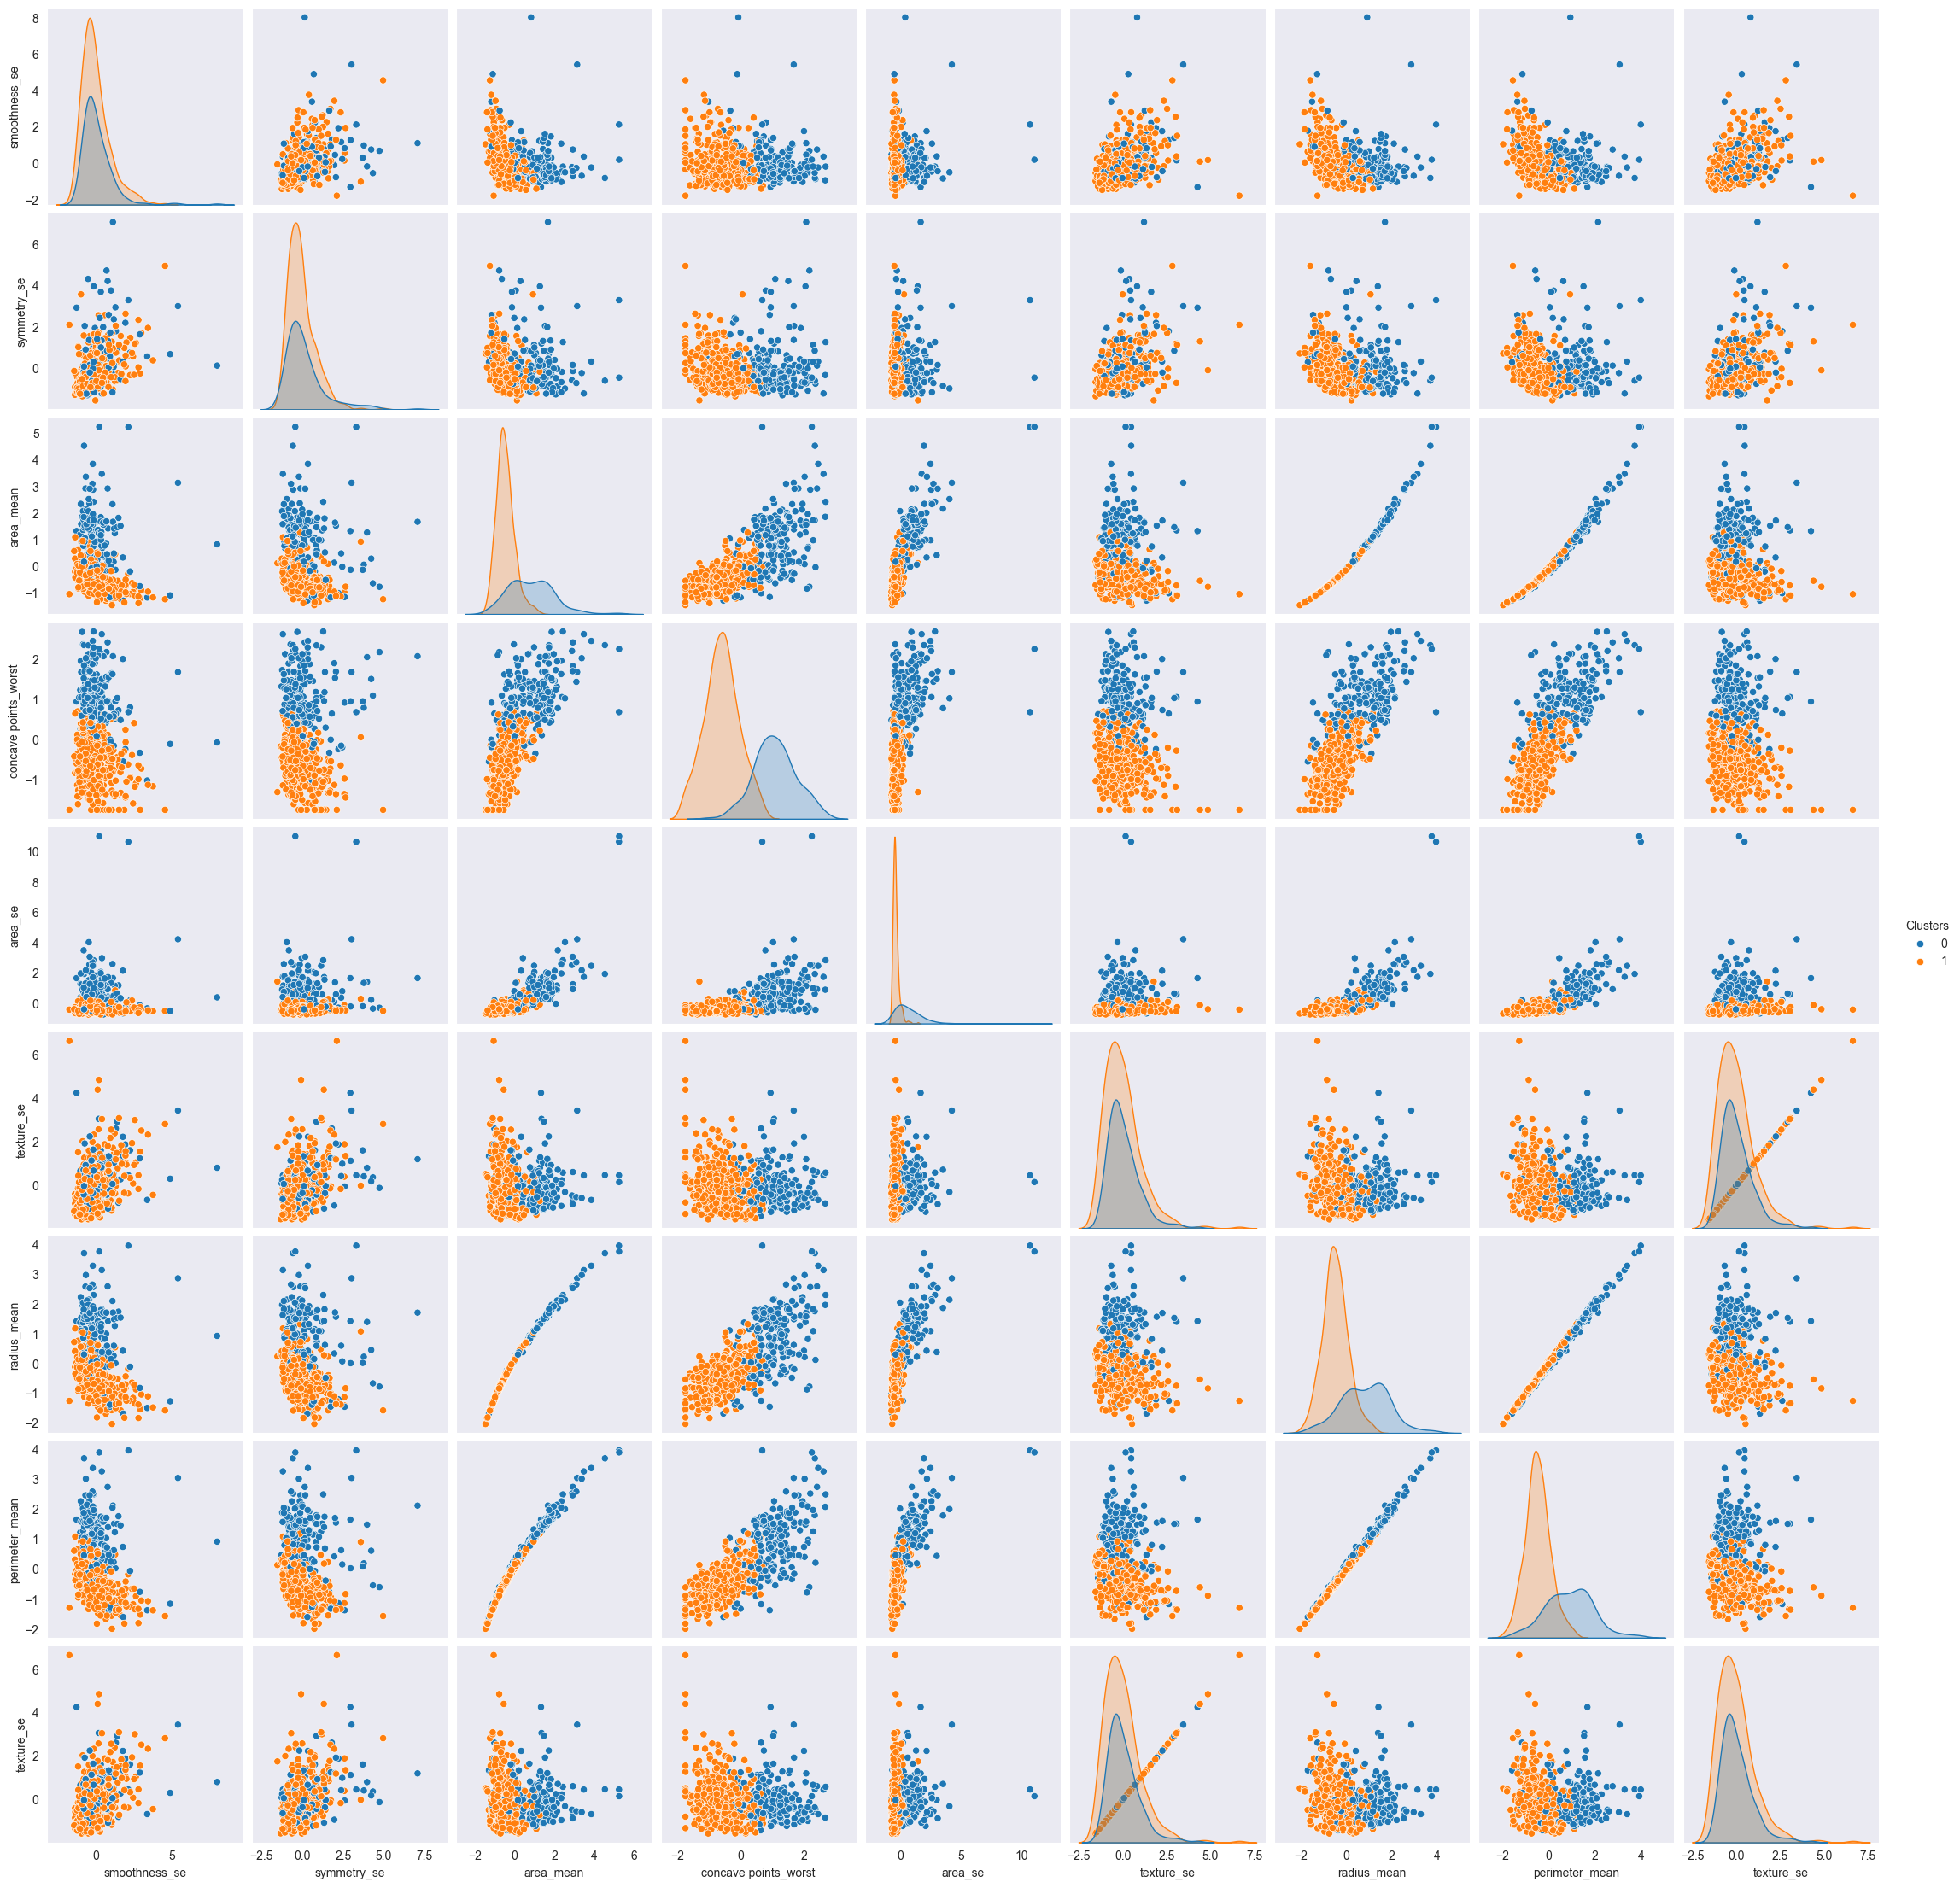

In [123]:
sns.pairplot(standardized_df, hue='Clusters', vars=subset)
plt.show()

What are out insights? 

How do they compare to the K-Means insights? 

# Look into the future

After another team got to work on using our insights to help guide their process to figuring out what was the difference between the different tumors, they were able to provide the same dataset where they determined the difference was that some tumors were benign and some were malignant. 

Lets see how useful our insights were!

In [124]:
# READ! IN! THAT! DATA!!! (AGAIN!!!)
df = pd.read_csv("Cancer_Data.csv")

target = df['diagnosis']
features = df.drop(columns=['diagnosis'])

features2 = StandardScaler().fit_transform(features)

standardized_features_df = pd.DataFrame(features2, columns=features.columns)

df = pd.concat([standardized_features_df, target.reset_index(drop=True)], axis=1)


c:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


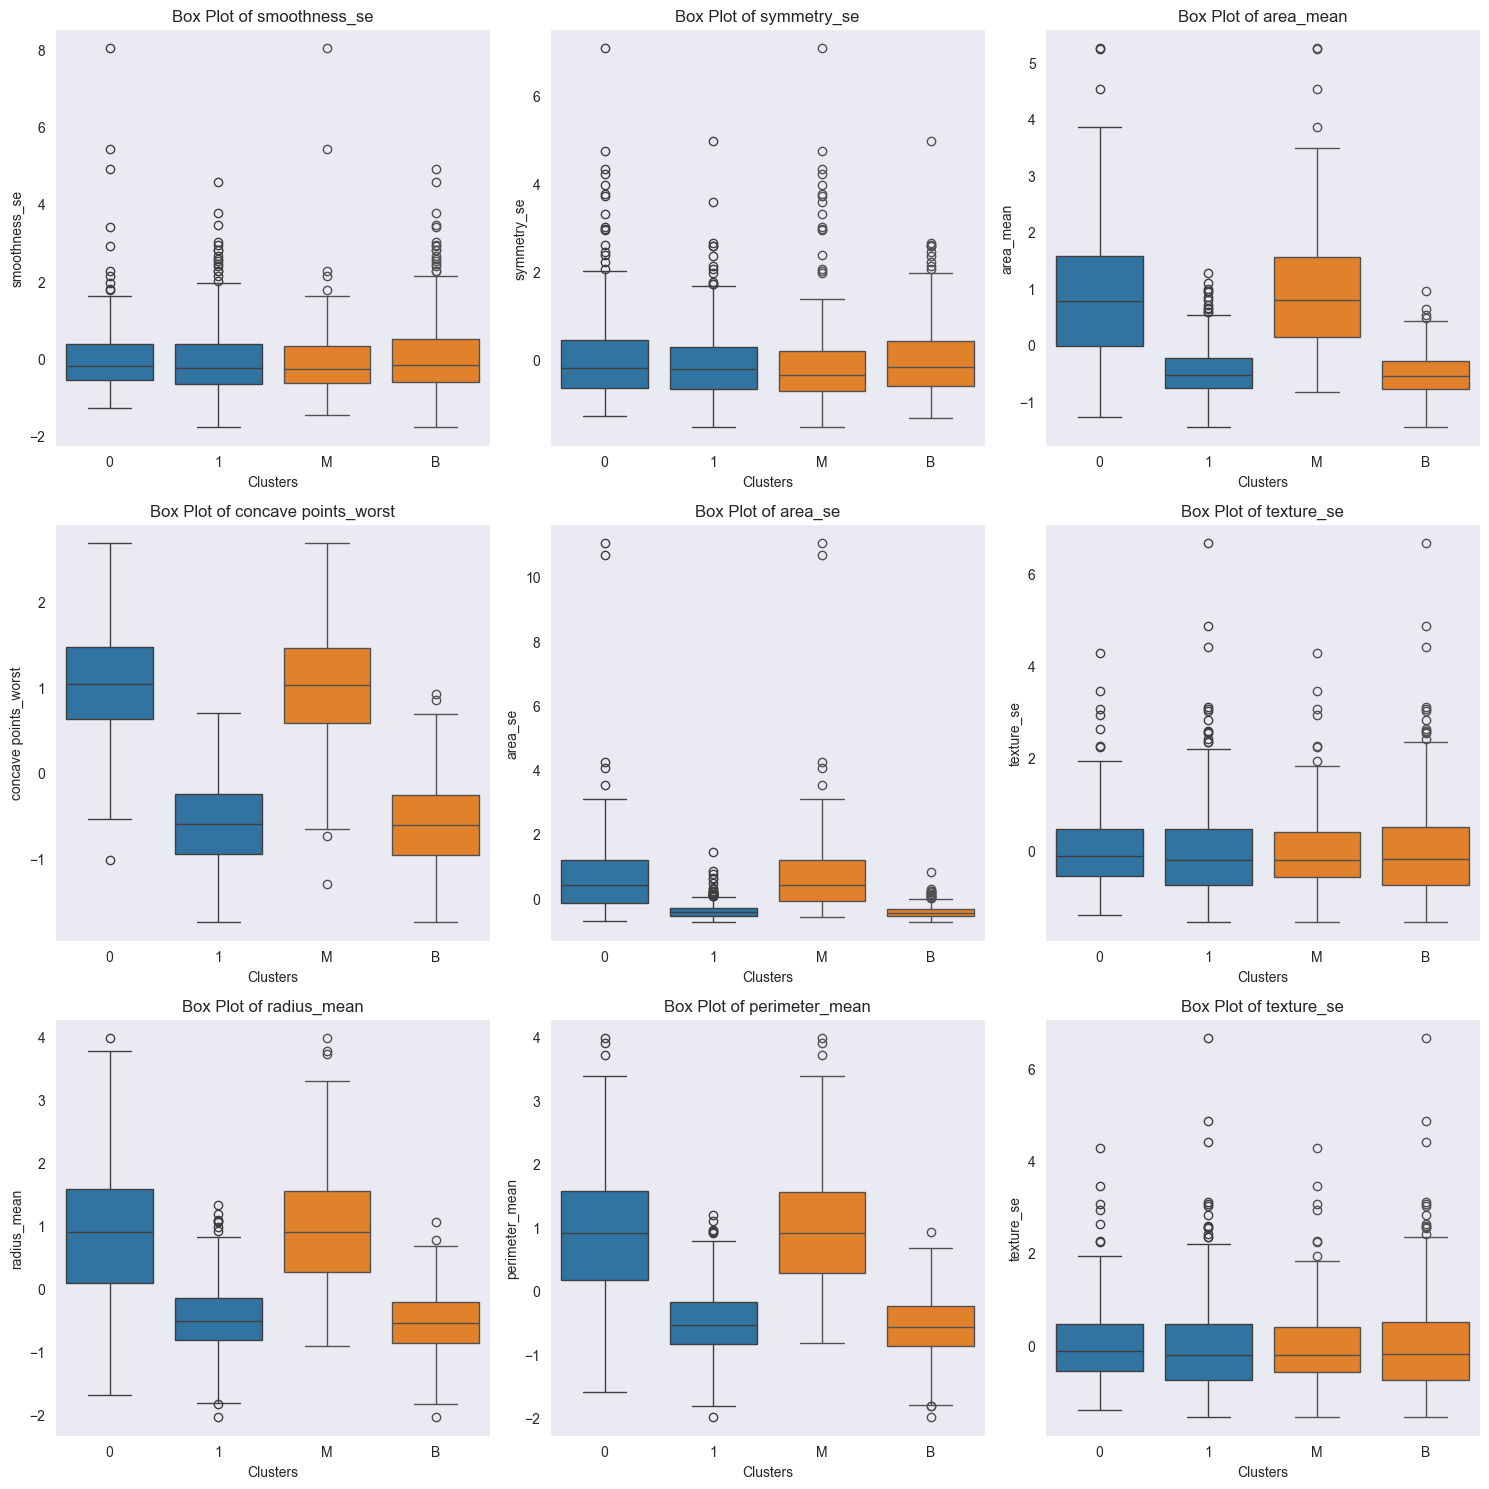

In [125]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten() # need this so you can index axs as a 1D array rather than a multidimensional array

i = 0

for column in subset:
    sns.boxplot(data=standardized_df, y=column, x=standardized_df["Clusters"], ax = axs[i])
    sns.boxplot(data=df, y=column, x=df["diagnosis"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

Did our insights hold some truth or did we miss the mark? 